In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:


titanic_df = pd.read_csv('titanic.csv')

In [3]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

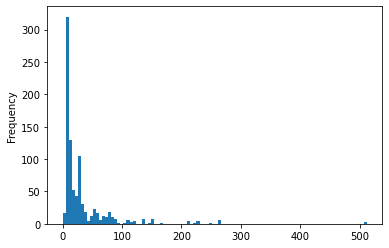

In [5]:
titanic_df.Fare.plot(kind='hist', bins = 100)

In [6]:
df = titanic_df

In [7]:
def change_fare_for_ten(df):
    if df.Fare > 200: 
        return 200
    return df.Fare // 10 * 10

In [8]:
df['Fare'] = df.apply(change_fare_for_ten,axis=1)

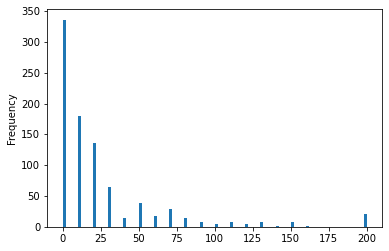

In [9]:
df.Fare.plot(kind='hist', bins = 100)

In [10]:
def change_age_for_ten(df):
    if df.Age > 200: 
        return 200
    return df.Age // 10 * 10

In [11]:
df['Age'] = df.apply(change_age_for_ten,axis=1)

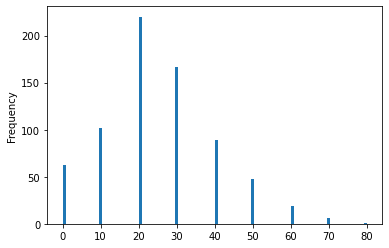

In [12]:
df.Age.plot(kind='hist', bins = 100)

In [13]:
new_df = df.drop(['Ticket', 'PassengerId'], 1)

In [14]:
new_df = pd.get_dummies(data=df, columns=['Pclass', 'Sex','Embarked'])

In [15]:
new_df.dtypes

PassengerId      int64
Survived         int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [16]:
new_df.Cabin.convert_dtypes()

0      <NA>
1       C85
2      <NA>
3      C123
4      <NA>
       ... 
886    <NA>
887     B42
888    <NA>
889    C148
890    <NA>
Name: Cabin, Length: 891, dtype: string

In [31]:
new_df['Cabin_check'] = new_df.Cabin.fillna(1)

In [35]:
ser = new_df.Cabin_check

In [49]:
new_df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_check
0,1,0,"Braund, Mr. Owen Harris",20.0,1,0,A/5 21171,0.0,NaN,0,0,1,0,1,0,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",30.0,1,0,PC 17599,70.0,C85,1,0,0,1,0,1,0,0,C85
2,3,1,"Heikkinen, Miss. Laina",20.0,0,0,STON/O2. 3101282,0.0,NaN,0,0,1,1,0,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",30.0,1,0,113803,50.0,C123,1,0,0,1,0,0,0,1,C123
4,5,0,"Allen, Mr. William Henry",30.0,0,0,373450,0.0,NaN,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",20.0,0,0,211536,10.0,NaN,0,1,0,0,1,0,0,1,1
887,888,1,"Graham, Miss. Margaret Edith",10.0,0,0,112053,30.0,B42,1,0,0,1,0,0,0,1,B42
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,20.0,NaN,0,0,1,1,0,0,0,1,1
889,890,1,"Behr, Mr. Karl Howell",20.0,0,0,111369,30.0,C148,1,0,0,0,1,1,0,0,C148


In [46]:
def change_cabin(df):
    if new_df.Cabin_check != '1': 
        return '0'

Очень много времени потратил на диагностику следующей ошибки. Хотел сделать две группы, где комната указана (1), и где нет(0). Пробовал и с Nan, и с  единицей, и с кавычками, всё время выдаёт ошибки. Ненавижу ошибки типа данных в Пандас:

In [48]:
new_df['Cabn_chk'] = new_df.apply(change_cabin,axis=1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**************************************************************************************************

In [55]:
test_df = new_df.drop(['Ticket', 'Cabin'], 1)

In [58]:
cabin_check_df = pd.get_dummies(data=test_df, columns=['Cabin_check'])

In [69]:
cabin_check_df.iloc[:, 15]

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_check_1, Length: 891, dtype: uint8

In [70]:
test_df['Cabin_bool'] = cabin_check_df.iloc[:, 15]

In [76]:
fin_df = test_df.drop(['Cabin_check', 'Name','PassengerId'], 1)

In [77]:
fin_df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_bool
0,0,20.0,1,0,0.0,0,0,1,0,1,0,0,1,1
1,1,30.0,1,0,70.0,1,0,0,1,0,1,0,0,0
2,1,20.0,0,0,0.0,0,0,1,1,0,0,0,1,1
3,1,30.0,1,0,50.0,1,0,0,1,0,0,0,1,0
4,0,30.0,0,0,0.0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,20.0,0,0,10.0,0,1,0,0,1,0,0,1,1
887,1,10.0,0,0,30.0,1,0,0,1,0,0,0,1,0
888,0,NaN,1,2,20.0,0,0,1,1,0,0,0,1,1
889,1,20.0,0,0,30.0,1,0,0,0,1,1,0,0,0


In [79]:
fin_df.dropna(inplace=True)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(fin_df.drop('Survived',axis=1), fin_df['Survived'], test_size=0.33, random_state=42, stratify = fin_df['Survived'])

In [85]:
from sklearn.preprocessing import StandardScaler
import numpy as np
ss = StandardScaler()

In [86]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [87]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [90]:
model = rfc.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
display(rfc.score(X_train_scaled, y_train))

0.799163179916318

In [92]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))


Accuracy: 0.7754237288135594
Precision: 0.8028169014084507
Recall: 0.59375
F1: 0.6826347305389222


Кажется, получилось лучше, чем во время лекции....

# ROC-AUC

In [93]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [94]:
model.predict_proba(X_test)[:,1]

array([0.31875147, 0.36440224, 0.49294631, 0.31875147, 0.22327188,
       0.37891034, 0.49294631, 0.22327188, 0.22327188, 0.34130617,
       0.31875147, 0.39706416, 0.22327188, 0.49002696, 0.49002696,
       0.56438474, 0.27395339, 0.39285358, 0.22732245, 0.36440224,
       0.35030883, 0.33164206, 0.22327188, 0.54254609, 0.22327188,
       0.22327188, 0.22327188, 0.34130617, 0.56056638, 0.4862086 ,
       0.39174091, 0.37295248, 0.22516029, 0.37891034, 0.39396309,
       0.31875147, 0.37520583, 0.22327188, 0.25142828, 0.33380422,
       0.22327188, 0.39174091, 0.28975846, 0.38031548, 0.49294631,
       0.34130617, 0.24854349, 0.22327188, 0.31790296, 0.22732245,
       0.37891034, 0.24854349, 0.38031548, 0.38413384, 0.40572367,
       0.34130617, 0.52663285, 0.25142828, 0.5614654 , 0.3400829 ,
       0.25142828, 0.53962674, 0.35575856, 0.54254609, 0.4862086 ,
       0.22327188, 0.38760892, 0.37891034, 0.38833364, 0.56056638,
       0.22327188, 0.37891034, 0.49002696, 0.54254609, 0.55764

In [95]:
pred_proba = model.predict_proba(X_test)[:,1]

In [96]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.818


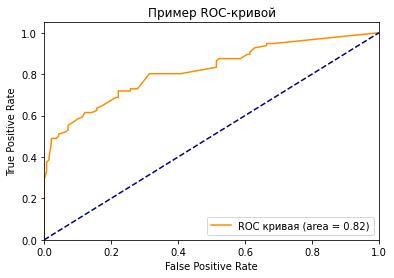

In [97]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [99]:
pd.DataFrame(treshold)

,0
0,1.564385
1,0.564385
2,0.561465
3,0.560566
4,0.557647
...,...
57,0.248543
58,0.245370
59,0.227322
60,0.225160


# Подбор гиперпараметров

In [100]:
test_deep = []
for deep in range (1,31):
  for leaf in range (1,5):
    # print("--------", deep, "--------", leaf)
    clf = tree.DecisionTreeClassifier(max_depth=deep, min_samples_leaf=leaf)
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_deep.append([deep,leaf,f1_score(y_test,pred),recall_score(y_test,pred)])

In [101]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['tree_depth','leaf','f1_score','recall_score']
# test_deep.sort_values(by='f1_score',ascending=False).head()

In [102]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,tree_depth,leaf,f1_score,recall_score
97,25,2,0.759777,0.708333
28,8,1,0.758242,0.718750
96,25,1,0.756477,0.760417
37,10,2,0.754098,0.718750
89,23,2,0.752809,0.697917
73,19,2,0.751381,0.708333
24,7,1,0.751381,0.708333
40,11,1,0.750000,0.718750
64,17,1,0.750000,0.750000
100,26,1,0.750000,0.750000


# GridSearch

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [104]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_leaf':[1,2,3,4,5]}

In [107]:
tree_para

{'criterion': ['gini', 'entropy'],
 'max_depth': [4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  15,
  20,
  30,
  40,
  50,
  70,
  90,
  120,
  150],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [108]:
clf_gs = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring = 'recall')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='recall')

In [109]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4}

# New best params

In [110]:
model_new = DecisionTreeClassifier(**clf_gs.best_params_)


In [111]:
model_new.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [112]:
new_pred = model_new.predict(X_test)

In [113]:
print('Accuracy:',accuracy_score(y_test,new_pred))
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))


Accuracy: 0.7838983050847458
Precision: 0.7848101265822784
Recall: 0.6458333333333334
F1: 0.7085714285714286


# Кросс-валидация

In [114]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model_new, X_train, y_train, cv=cv, scoring='recall')


In [115]:
scores.mean()

0.6639866653303307

In [117]:
pd.DataFrame(scores)

,0
0,0.803030
1,0.540541
2,0.652174
3,0.671642
4,0.634921
5,0.735294
6,0.641791
7,0.652174
8,0.550725
9,0.757576
